In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
import scipy.signal as sig
import scipy.integrate as sciint
from functools import partial

# Mine
from wilson_cowan_2d.simulations import concrete_wc_kernel as wck
from wilson_cowan_2d.simulations import wc_params as wcp
from wilson_cowan_2d.simulations.nonlinear_functions import decreasing_exponential
from wilson_cowan_2d.analysis.nulclines import calc_cross_points, calc_nulclines_crosspoints
%load_ext autoreload
%autoreload 2

[[ 4.0000000e-03  7.5000000e-02  4.2400000e-01]
 [-4.4408921e-16 -4.4408921e-16  2.0462500e-01]]


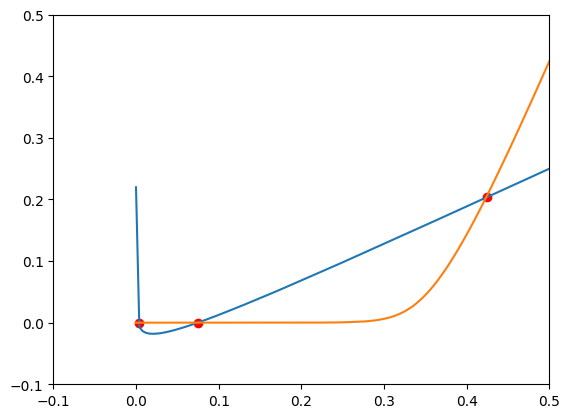

In [2]:
τe = 1
τi = 0.24 * τe
σe = 1
σi = 1.8* σe

param = wcp.DefaultParams(τ = np.array([τe, τi]), η = 1, size = 2**9, σ=np.array([σe,σi]))
# param.Θ = np.array([0.08, 0.4])

u,v,cps = calc_nulclines_crosspoints(param)
_ = plt.plot(*u)
_ = plt.plot(*v)
_ = plt.scatter(*cps, c='r')
_ = plt.xlim(-0.1, 0.5)
_ = plt.ylim(-0.1, 0.5)
print(cps)

u_str = cps[0,-1]
v_str = cps[1,-1]

u_str = 0
v_str = 0

u = u_str*np.ones(param.size).reshape((param.size,1))
u[0:2**0] = 1
v = v_str*np.ones(param.size).reshape((param.size, 1))
# v[0:2**0] = 1
#  inp = (u3, v3, u3, 0)

inp = (u, v)

The solver successfully reached the end of the integration interval.


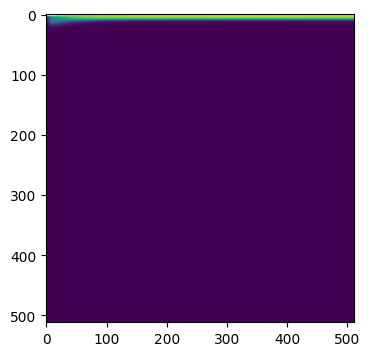

In [18]:
τe = 1
τi = 0.1 * τe
σe = 1
σi = 1.85 * σe
param = wcp.DefaultParams(τ = np.array([τe, τi]), η = 1, size = 2**9, σ=np.array([σe,σi]))
u_str = 0
v_str = 0

u = u_str*np.ones(param.size).reshape((param.size,1))
u[0:2**2] = 1
v = v_str*np.ones(param.size).reshape((param.size, 1))
inp = (u, v)
end = 30
step = end/(param.size)

trv_wav = wck.WCReflectDecExpTravelNonLocal1D(inp, param)
res = trv_wav((0, end), t_eval=np.arange(0, end, step))

print(res._solved.message)


fig = plt.figure(figsize=(16,4))
_ = plt.imshow(res.u.T, vmin=0, vmax=1)


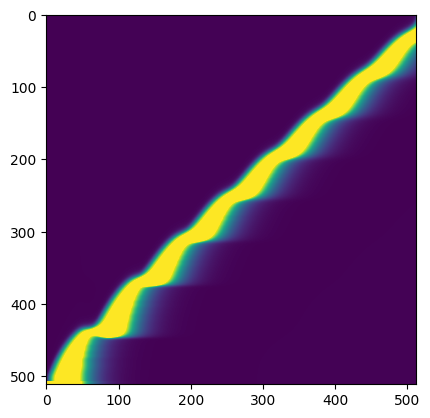

In [669]:
fig = plt.figure()
plt.imshow(np.flip(res.u[:,:param.size].T, axis=0), aspect='equal', vmin=0, vmax=0.5)# plt.colorbar()

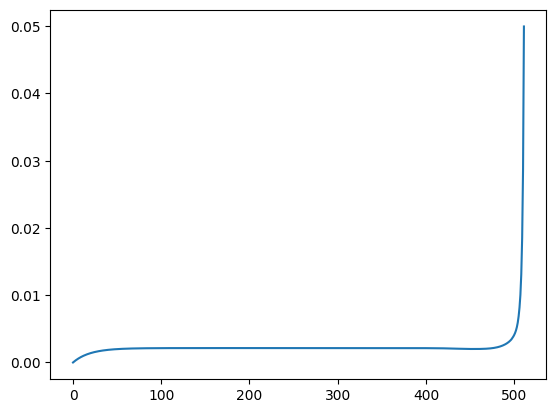

In [662]:
_ = plt.plot(res.u[:, -1])

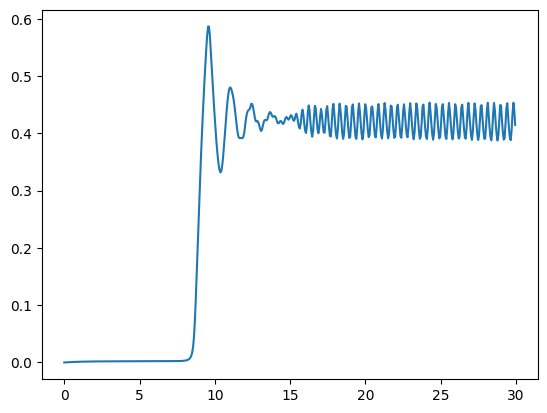

In [640]:
_ = plt.plot(res.t, res.u[:, 300])

In [275]:
size = 2**8
abss = np.abs(np.linspace(-2*size, 2*size, 2*size-1))
# DEe = decreasing_exponential(abss, σe)


In [135]:
np.log2(abss.size+1)

9.0